Educational Business Intelligence Analysis
Project στόχος: Ανάλυση & πρόβλεψη KPIs Εκπαιδευτηρίου
Περιλαμβάνει: Τάσεις, Forecasting, Οπτικοποιήσεις, Export

In [2]:
import pandas as pd

# Φόρτωση αρχείου
df = pd.read_excel("educational_financial_data.xlsx", engine="openpyxl")

# Δημιουργία στήλης ημερομηνίας από Year + Month
df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"], format="%Y-%B")

# Ταξινόμηση με βάση την ημερομηνία (προαιρετικά)
df = df.sort_values("Date").reset_index(drop=True)

# Προεπισκόπηση
df.head()

,Year,Month,Student Count,New Enrollments,Tuition Revenue (€),Operational Costs (€),Marketing Costs (€),Technology Costs (€),CSAT Score,Automation Success Rate,Dropouts,Response Time (sec),Intent Correct (%),Date
0,2022,January,525,24,182079,34895,8852,2829,3.96,0.89,6,55.30,0.87,2022-01-01
1,2022,January,533,14,123609,66035,7000,8939,3.77,0.76,5,45.57,0.92,2022-01-01
2,2022,January,516,36,113888,48073,8710,5652,4.04,0.52,9,50.24,0.85,2022-01-01
3,2022,January,711,35,173797,72685,9239,7218,4.63,0.59,4,51.08,0.78,2022-01-01
4,2022,January,590,45,165953,85114,12403,4415,4.13,0.86,1,38.52,0.73,2022-01-01


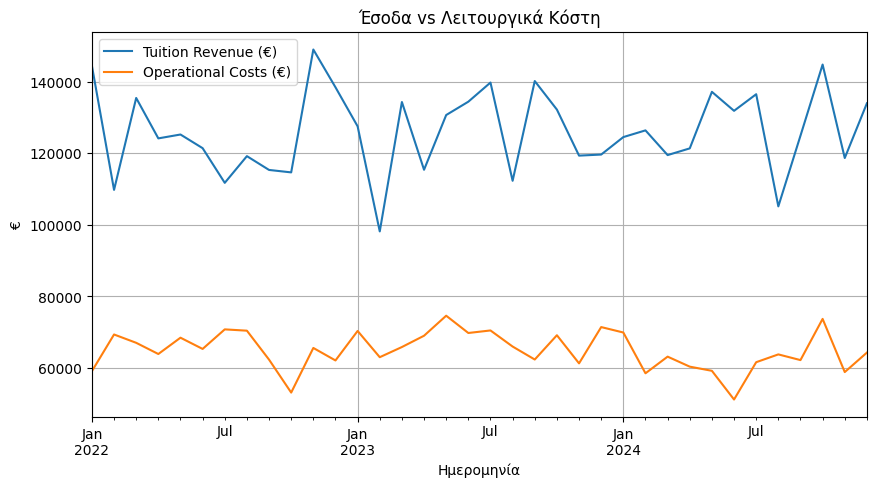

In [5]:
# Ομαδοποίηση κατά ημερομηνία
monthly_data = df.groupby("Date").agg({
    "Tuition Revenue (€)": "mean",
    "Operational Costs (€)": "mean",
    "New Enrollments": "mean",
    "Student Count": "mean"
}).sort_index()

# Οπτικοποίηση Έσοδα vs Κόστη
import matplotlib.pyplot as plt

monthly_data[["Tuition Revenue (€)", "Operational Costs (€)"]].plot(figsize=(10,5))
plt.title("Έσοδα vs Λειτουργικά Κόστη")
plt.ylabel("€")
plt.xlabel("Ημερομηνία")
plt.grid(True)
plt.show()


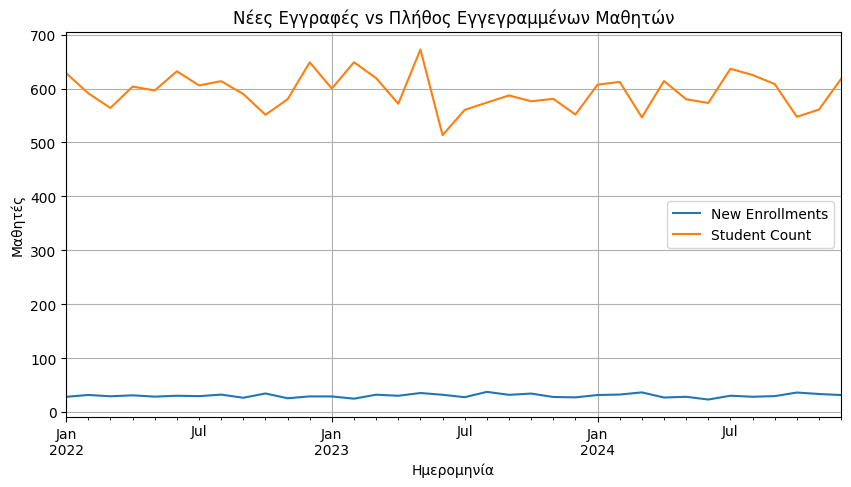

In [6]:
# 📊 Νέες εγγραφές και πλήθος μαθητών ανά μήνα
monthly_data[["New Enrollments", "Student Count"]].plot(figsize=(10, 5))

plt.title("Νέες Εγγραφές vs Πλήθος Εγγεγραμμένων Μαθητών")
plt.ylabel("Μαθητές")
plt.xlabel("Ημερομηνία")
plt.grid(True)
plt.show()

In [8]:

# 1. Growth Rate των μαθητών ανά μήνα (%)
monthly_data["Student Growth (%)"] = monthly_data["Student Count"].pct_change() * 100

# 2. Ποσοστό νέων εγγραφών σε σχέση με το συνολικό αριθμό μαθητών
monthly_data["Enrollment Rate (%)"] = (monthly_data["New Enrollments"] / monthly_data["Student Count"]) * 100

# 3. Dropout Ratio (αν υπάρχει η στήλη "Dropouts")
dropouts_per_month = df.groupby("Date")["Dropouts"].mean()
monthly_data["Dropout Ratio (%)"] = (dropouts_per_month / monthly_data["Student Count"]) * 100

# 4. Καθαρές εγγραφές = Νέες εγγραφές - Αποχωρήσεις
monthly_data["Net Enrollment"] = monthly_data["New Enrollments"] - dropouts_per_month

# 5. Έσοδα ανά μαθητή
monthly_data["Revenue per Student (€)"] = monthly_data["Tuition Revenue (€)"] / monthly_data["Student Count"]

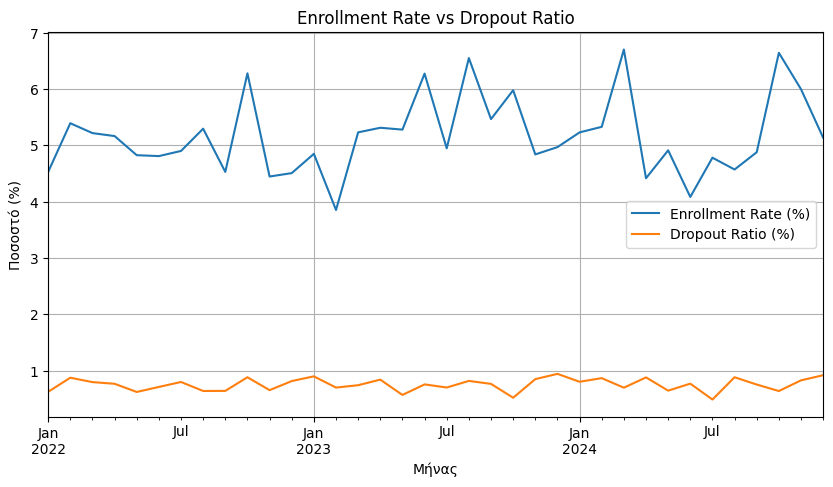

In [9]:
monthly_data[["Enrollment Rate (%)", "Dropout Ratio (%)"]].plot(figsize=(10,5))
plt.title("Enrollment Rate vs Dropout Ratio")
plt.ylabel("Ποσοστό (%)")
plt.xlabel("Μήνας")
plt.grid(True)
plt.show()

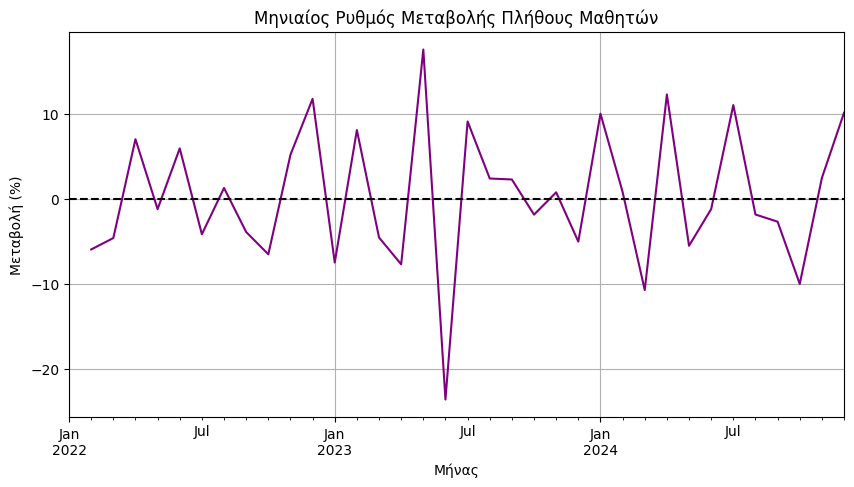

In [10]:
monthly_data["Student Growth (%)"].plot(figsize=(10,5), color='purple')
plt.title("Μηνιαίος Ρυθμός Μεταβολής Πλήθους Μαθητών")
plt.ylabel("Μεταβολή (%)")
plt.xlabel("Μήνας")
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.show()

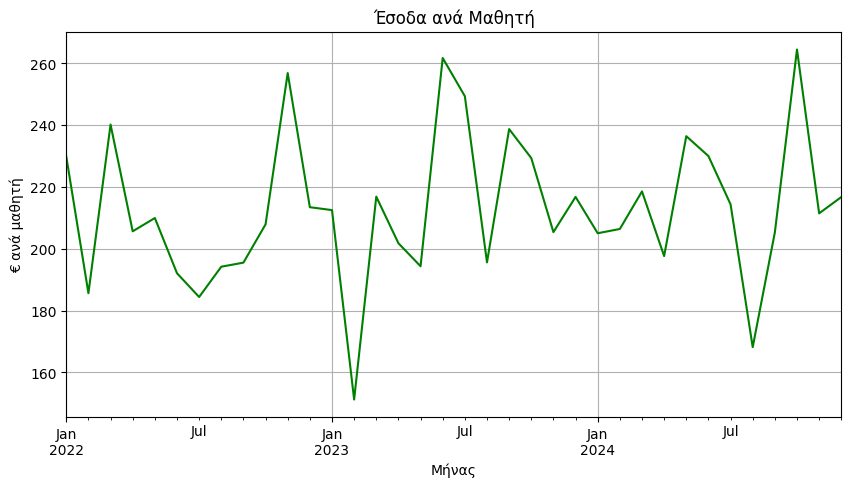

In [11]:
monthly_data["Revenue per Student (€)"].plot(figsize=(10,5), color='green')
plt.title("Έσοδα ανά Μαθητή")
plt.ylabel("€ ανά μαθητή")
plt.xlabel("Μήνας")
plt.grid(True)
plt.show()

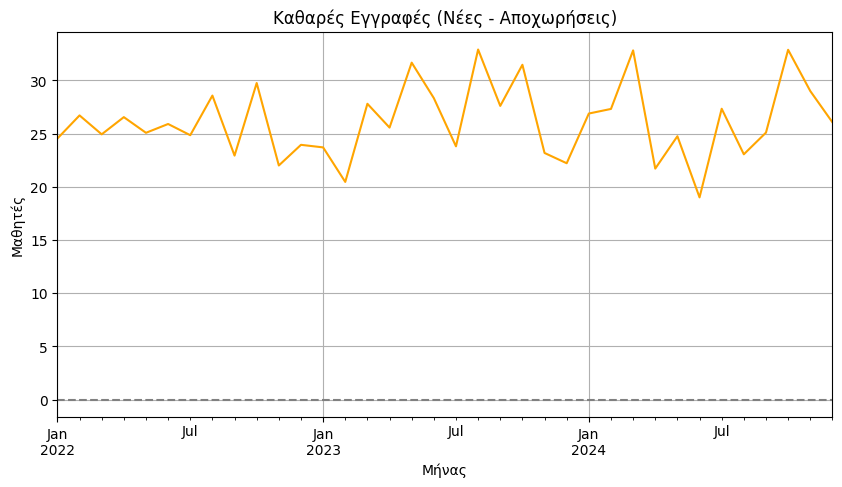

In [12]:
monthly_data["Net Enrollment"].plot(figsize=(10,5), color='orange')
plt.title("Καθαρές Εγγραφές (Νέες - Αποχωρήσεις)")
plt.ylabel("Μαθητές")
plt.xlabel("Μήνας")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()


In [13]:
# Εξαγωγή όλων των KPIs σε Excel
monthly_data.to_excel("monthly_kpis_for_tableau.xlsx", index=True)
print("Το αρχείο 'monthly_kpis_for_tableau.xlsx' αποθηκεύτηκε με επιτυχία.")

Το αρχείο 'monthly_kpis_for_tableau.xlsx' αποθηκεύτηκε με επιτυχία.
